# Clothing classification

### Author: Adriana Bukala

Today we will build a convolution neural network (CNN) for clothing classification. Let's start with loading some important packages.

In [1]:
from lime import lime_image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical

from tensorflow.random import set_seed

We will set a random seed, to make our results more reproducible.

In [2]:
set_seed(16)

## Data loading

We will work on **Fashion MNIST** data - a popular, image classification dataset, containing 10 different clothing categories.

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Now, let's look at some examples. In our dataset we have 10 following clothing categories.

In [4]:
classes = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Let's find some exemplary images to show.

In [5]:
examples = {}
for idx, c in enumerate(y_train):
    if len(examples) == 10:
        break
    elif c not in examples.keys():
        examples[c] = idx

In [6]:
examples = dict(sorted(examples.items(), key=lambda x: x[0]))
examples

{0: 1, 1: 16, 2: 5, 3: 3, 4: 19, 5: 8, 6: 18, 7: 6, 8: 23, 9: 0}

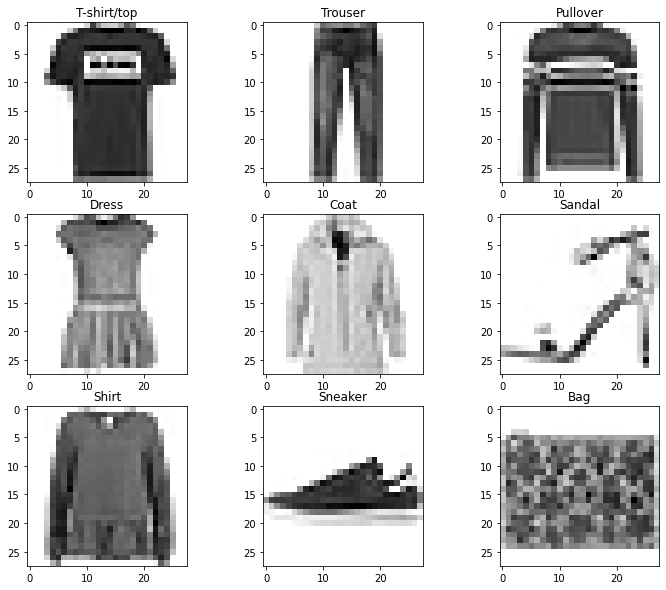

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(X_train[examples[i]], cmap='binary')
    ax.set_title(classes[i])

plt.show()

It seems like **pullovers, coats** and **shirts** can be remarkably similar, so distinguishing them can be a problem.

## Data preprocessing

We need to transform y vectors to one-hot-encoded labels, and reshape X data, because of compatibility with Keras functions.

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
n_images, n_rows, n_cols = X_train.shape

X_train = X_train.reshape(n_images, n_rows, n_cols, 1)
X_test = X_test.reshape(X_test.shape[0], n_rows, n_cols, 1)

## Model1

In our first model, we will use:
* convolution layer (**Conv2D**) - provides spatial convolution over images,
* dropout (**Dropout**) - randomly inactivates some neurons, leading to better neuron specialization,
* max pooling (**MaxPooling2D**) - takes maximum value over defined window,
* normalization (**BatchNormalization**) - normalizes input,
* flatten (**Flatten**) - flattens input to 1D,
* dense (**Dense**) - creates densely-connected layer.

Mostly we will use **ReLu** activation function to provide non-linearity to our function. As for our last layer, we will use **softmax**, so we can get a categorical prediction.

Finally, we define **accuracy** as our validation metrics, **categorical_crossentropy** as our loss metrics, and **Adam optimizer** for back propagation.

In [10]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size = (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size = (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2 ,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3, 3), activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size = (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
    
model.add(Dense(10, activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)       0

## Classification1

Let's train our model and check its learning progress.

In [12]:
history = model.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=10)

Epoch 1/10
750/750 [==============================] - 125s 166ms/step - loss: 0.6273 - accuracy: 0.7869 - val_loss: 0.3597 - val_accuracy: 0.8722
Epoch 2/10
750/750 [==============================] - 124s 166ms/step - loss: 0.2903 - accuracy: 0.8928 - val_loss: 0.2845 - val_accuracy: 0.8986
Epoch 3/10
750/750 [==============================] - 124s 166ms/step - loss: 0.2368 - accuracy: 0.9140 - val_loss: 0.3185 - val_accuracy: 0.8899
Epoch 4/10
750/750 [==============================] - 125s 166ms/step - loss: 0.2083 - accuracy: 0.9217 - val_loss: 0.2620 - val_accuracy: 0.9103
Epoch 5/10
750/750 [==============================] - 124s 166ms/step - loss: 0.1785 - accuracy: 0.9342 - val_loss: 0.2590 - val_accuracy: 0.9101
Epoch 6/10
750/750 [==============================] - 124s 166ms/step - loss: 0.1619 - accuracy: 0.9393 - val_loss: 0.2624 - val_accuracy: 0.9128
Epoch 7/10
750/750 [==============================] - 124s 166ms/step - loss: 0.1496 - accuracy: 0.9437 - val_loss: 0.2571 -

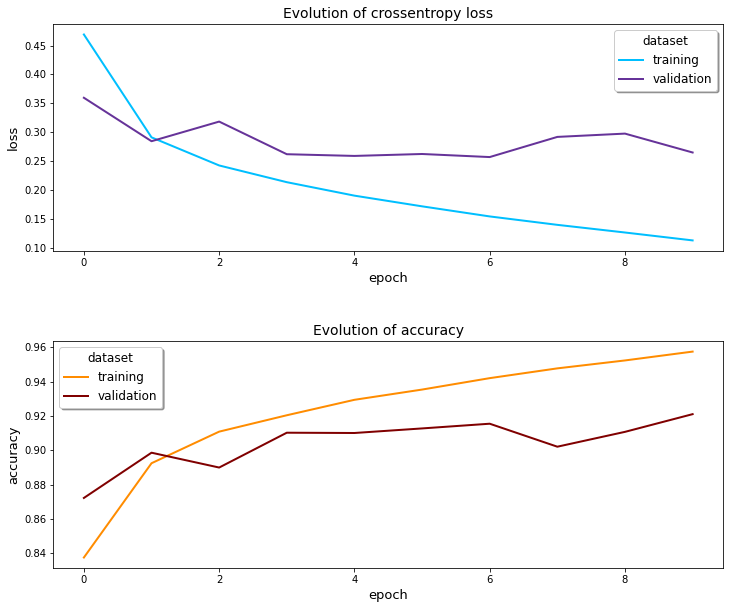

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

ax1.set_title('Evolution of crossentropy loss', fontsize=14)
ax1.plot(history.history['loss'], color='deepskyblue', label='training', lw=2)
ax1.plot(history.history['val_loss'], color='rebeccapurple', label='validation', lw=2)
ax1.legend(loc='best', shadow=True, fontsize='large', title='dataset', title_fontsize='large')
ax1.set_xlabel('epoch', fontsize=13)
ax1.set_ylabel('loss', fontsize=13)

ax2.set_title('Evolution of accuracy', fontsize=14)
ax2.plot(history.history['accuracy'], color='darkorange', label='training', lw=2)
ax2.plot(history.history['val_accuracy'], color='maroon',label='validation', lw=2)
ax2.legend(loc='best', shadow=True, fontsize='large', title='dataset', title_fontsize='large')
ax2.set_xlabel('epoch', fontsize=13)
ax2.set_ylabel('accuracy', fontsize=13)

plt.show()

In [14]:
print((f"Final accuracy: {history.history['accuracy'][-1]} (train), "
       f"{history.history['val_accuracy'][-1]} (validation)"))
print((f"Final loss: {history.history['loss'][-1]} (train), "
       f"{history.history['val_loss'][-1]} (validation)"))

Final accuracy: 0.957604169845581 (train), 0.9210833311080933 (validation)
Final loss: 0.11283281445503235 (train), 0.26498159766197205 (validation)


We got satisfying results on both datasets, so we will move on to the test set.

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2780 - accuracy: 0.9172


[0.27803534269332886, 0.9172000288963318]

Everything looks good. Now, we will find some interesting observation to analyze.

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred[abs(y_pred) < 0.01] = 0

In [18]:
np.where((y_pred != y_test).any(1))[0][:100]

array([  0,   1,   4,   6,   7,  10,  11,  12,  13,  14,  16,  17,  19,
        20,  21,  23,  25,  26,  27,  28,  29,  32,  33,  34,  35,  36,
        37,  39,  40,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,
        53,  54,  55,  57,  58,  59,  60,  61,  66,  67,  68,  70,  71,
        72,  73,  74,  75,  77,  79,  85,  86,  87,  88,  89,  91,  92,
        95,  96,  98,  99, 100, 101, 102, 103, 105, 107, 108, 109, 110,
       113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 129,
       130, 132, 134, 135, 136, 138, 139, 141, 142])

In this example our model was wrongly convinced that our item belongs to class 6.

In [45]:
y_pred[136], y_test[136]

(array([0.        , 0.        , 0.42901   , 0.        , 0.        ,
        0.        , 0.57093287, 0.        , 0.        , 0.        ],
       dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [46]:
obs_idx = 136
nonzeros = np.where(y_pred[obs_idx] != 0)[0]

Let's take a look at this image.

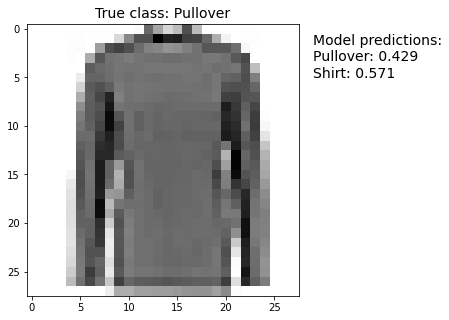

In [47]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.imshow(X_test[obs_idx], cmap='binary')
ax.set_title(f'True class: {classes[np.where(y_test[obs_idx] == 1)[0][0]]}', fontsize=14)
ax.text(29, 5, s=(f'Model predictions:\n'
                   f'{classes[nonzeros[0]]}: {y_pred[obs_idx][nonzeros[0]]:.3f}\n'
                   f'{classes[nonzeros[1]]}: {y_pred[obs_idx][nonzeros[1]]:.3f}'),
       fontsize=14)

plt.show()

It's definetely a pullover, so how our model explains its decision? Let's see using **LIME**.

In [48]:
explainer = lime_image.LimeImageExplainer()

In [49]:
def predict(images):
    shape = list(images.shape[:-1])
    shape.append(1)
    return model.predict(images[:, :, :, 0].reshape(shape))

In [50]:
explanation = explainer.explain_instance(
    X_test[obs_idx].astype('double').reshape(28, 28), 
    predict,
    top_labels=5,
    num_samples=1000,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

Let's compare predictions for two top classes - pullover and shirt.

In [51]:
def prepare_heatmap(explanation, i):
    ind =  explanation.top_labels[i]

    dict_heatmap = dict(explanation.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
    
    return heatmap

In [52]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

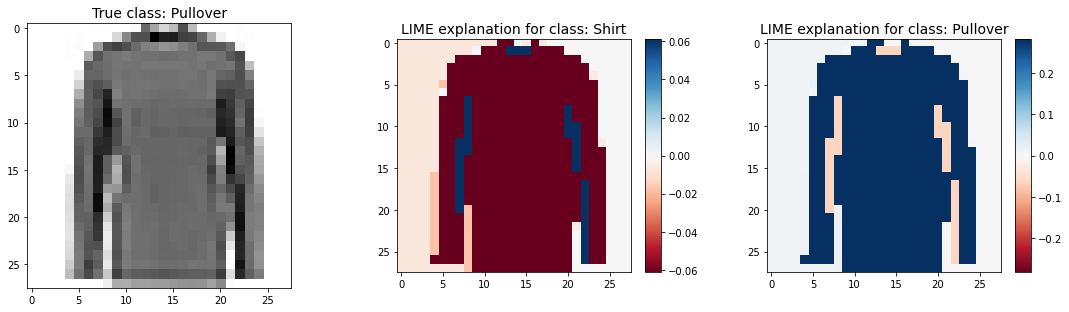

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4)

ax1.imshow(X_test[obs_idx], cmap='binary')
ax1.set_title(f'True class: {classes[np.where(y_test[obs_idx] == 1)[0][0]]}', fontsize=14)

heatmap = prepare_heatmap(explanation, 0)
p2 = ax2.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax2.set_title(f'LIME explanation for class: {classes[explanation.top_labels[0]]}', fontsize=14)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p2, cax=cax)

heatmap = prepare_heatmap(explanation, 1)
p3 = ax3.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax3.set_title(f'LIME explanation for class: {classes[explanation.top_labels[1]]}', fontsize=14)
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p3, cax=cax)

plt.show()

We can infer from these explanations that our model1 learned that **pullovers general shape and that they usually don't have a collar (which is obviously true). As for shirts, our model learned they have a collar and maybe that they have a tighter sleeves (which would be an interesting observation).** At least, if our LIME explanations are stable. Let's check some more pullovers.

In [84]:
pullover_examples = []

for i, row in enumerate(y_pred[50:]):
    if len(pullover_examples) == 10:
        break
    if 0.5 <= row[2]:
        print(i, row)
        pullover_examples.append(i)

4 [0.         0.         0.99998975 0.         0.         0.
 0.         0.         0.         0.        ]
5 [0.         0.         0.95553607 0.         0.         0.
 0.04372244 0.         0.         0.        ]
22 [0.         0.         0.98825747 0.         0.         0.
 0.         0.         0.         0.        ]
24 [0.         0.         0.9424977  0.         0.05748176 0.
 0.         0.         0.         0.        ]
27 [0.        0.        0.9999497 0.        0.        0.        0.
 0.        0.        0.       ]
37 [0.        0.        0.9999647 0.        0.        0.        0.
 0.        0.        0.       ]
48 [0.         0.         0.56137794 0.         0.43491852 0.
 0.         0.         0.         0.        ]
49 [0.         0.         0.99937516 0.         0.         0.
 0.         0.         0.         0.        ]
53 [0.         0.         0.9817059  0.         0.         0.
 0.01574275 0.         0.         0.        ]
60 [0.        0.        0.9971535 0.        0.  

Let's choose two stable (index 4 and 60) and one unstable prediction (index 48).

In [85]:
pullover_examples = [54, 98, 110]

In [86]:
pullover_explanations = []

for i in pullover_examples:
    pullover_explanations.append(explainer.explain_instance(
        X_test[i].astype('double').reshape(28, 28), 
        predict,
        top_labels=5,
        num_samples=1000
    )
                                )

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Let's check explanations for our stable predictions.

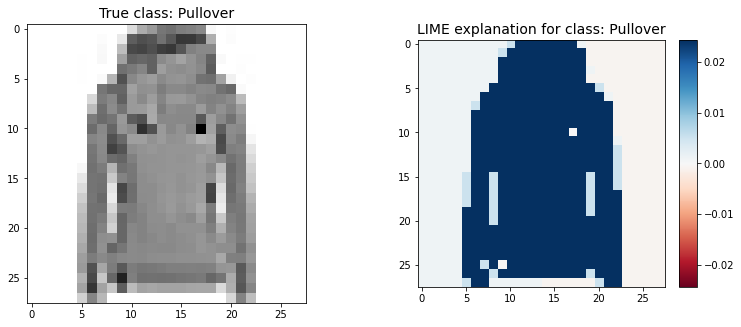

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4)

ax1.imshow(X_test[pullover_examples[0]], cmap='binary')
ax1.set_title(f'True class: {classes[np.where(y_test[pullover_examples[0]] == 1)[0][0]]}', fontsize=14)

heatmap = prepare_heatmap(pullover_explanations[0], 0)
p2 = ax2.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax2.set_title(f'LIME explanation for class: {classes[2]}', fontsize=14)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p2, cax=cax)

plt.show()

**It seems like this item was "a perfect pullover" - typical shape, it has a hood, and no collar or some graphics on it (as T-shirts usually do).**

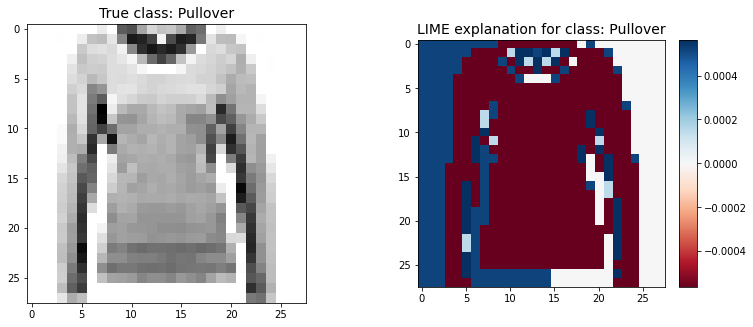

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4)

ax1.imshow(X_test[pullover_examples[2]], cmap='binary')
ax1.set_title(f'True class: {classes[np.where(y_test[pullover_examples[2]] == 1)[0][0]]}', fontsize=14)

heatmap = prepare_heatmap(pullover_explanations[2], 0)
p2 = ax2.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax2.set_title(f'LIME explanation for class: {classes[2]}', fontsize=14)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p2, cax=cax)

plt.show()

**This explanation is not compatible with our first one. What should concern us even more, is that blue part on the left side (indicating increase of probability of being a pullover). Obviously, it shouldn't be here - it's just a part of background, but, on the other hand, it has rather low weight.**

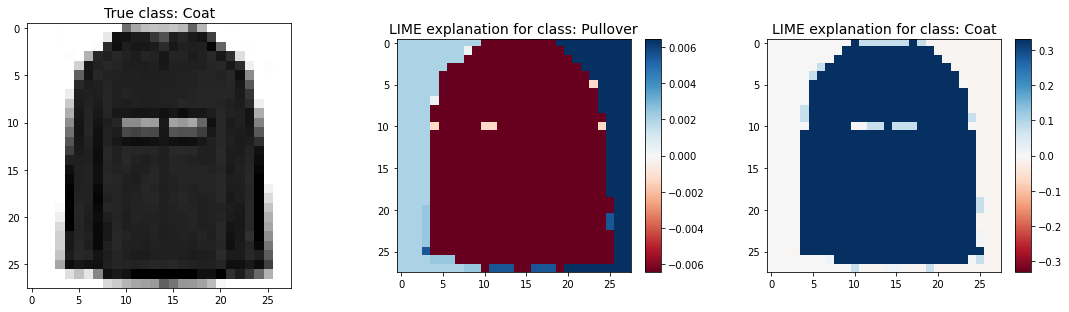

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4)

ax1.imshow(X_test[pullover_examples[1]], cmap='binary')
ax1.set_title(f'True class: {classes[4]}', fontsize=14)

heatmap = prepare_heatmap(pullover_explanations[1], 0)
p2 = ax2.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax2.set_title(f'LIME explanation for class: {classes[2]}', fontsize=14)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p2, cax=cax)

heatmap = prepare_heatmap(pullover_explanations[1], 1)
p3 = ax3.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax3.set_title(f'LIME explanation for class: {classes[4]}', fontsize=14)
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p3, cax=cax)

plt.show()

In this example, we have a coat, but our model1 thought it was more of a pullover. Explanations for being a coat are pretty clear. Hower, as for being a pullover we have same situation as before - it looks like model1 predicted this class based on image background, which is seriously concerning.

**All these examples are indicating that LIME explanations were unstable for our model1.**

## Model2

Now let's train another CNN model, but much simpler this time.

In [106]:
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.15))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))

model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(256, activation="relu"))
    
model2.add(Dense(10, activation="softmax"))
    
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [107]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 15488)            

In [108]:
history2 = model2.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=10)

Epoch 1/10
750/750 [==============================] - 74s 98ms/step - loss: 1.0516 - accuracy: 0.8083 - val_loss: 0.3194 - val_accuracy: 0.8846
Epoch 2/10
750/750 [==============================] - 73s 97ms/step - loss: 0.2458 - accuracy: 0.9104 - val_loss: 0.2824 - val_accuracy: 0.9038
Epoch 3/10
750/750 [==============================] - 74s 99ms/step - loss: 0.1942 - accuracy: 0.9280 - val_loss: 0.2717 - val_accuracy: 0.9111
Epoch 4/10
750/750 [==============================] - 69s 92ms/step - loss: 0.1577 - accuracy: 0.9427 - val_loss: 0.2894 - val_accuracy: 0.9054
Epoch 5/10
750/750 [==============================] - 73s 97ms/step - loss: 0.1482 - accuracy: 0.9457 - val_loss: 0.3034 - val_accuracy: 0.9097
Epoch 6/10
750/750 [==============================] - 73s 97ms/step - loss: 0.1383 - accuracy: 0.9506 - val_loss: 0.4223 - val_accuracy: 0.8832
Epoch 7/10
750/750 [==============================] - 73s 97ms/step - loss: 0.1172 - accuracy: 0.9562 - val_loss: 0.3453 - val_accuracy:

## Classification2

Let's check performance of our second model.

In [115]:
y_pred2 = model2.predict(X_test)
y_pred2[abs(y_pred2) < 0.01] = 0

In [109]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.4258 - accuracy: 0.9006


[0.42581817507743835, 0.900600016117096]

**Simpler model isn't as good classifier as previous, more complicated one.** Now, let's find some item on which our models have different opinions.

In [119]:
def predict2(images):
    shape = list(images.shape[:-1])
    shape.append(1)
    return model2.predict(images[:, :, :, 0].reshape(shape))

We will look for an observation, for which top LIME labels are different between both models.

In [137]:
obs_idx2 = None
i = 0

while obs_idx2 is None:
    explanation1 = explainer.explain_instance(
        X_test[i].astype('double').reshape(28, 28), 
        predict,
        top_labels=5,
        num_samples=1000,
    )
    explanation2 = explainer.explain_instance(
        X_test[i].astype('double').reshape(28, 28), 
        predict2,
        top_labels=5,
        num_samples=1000,
    )
    if explanation1.top_labels[0] == explanation2.top_labels[0]:
        i += 1
    else:
        obs_idx2 = i
        explanations2 = [explanation1, explanation2]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Let's check it!

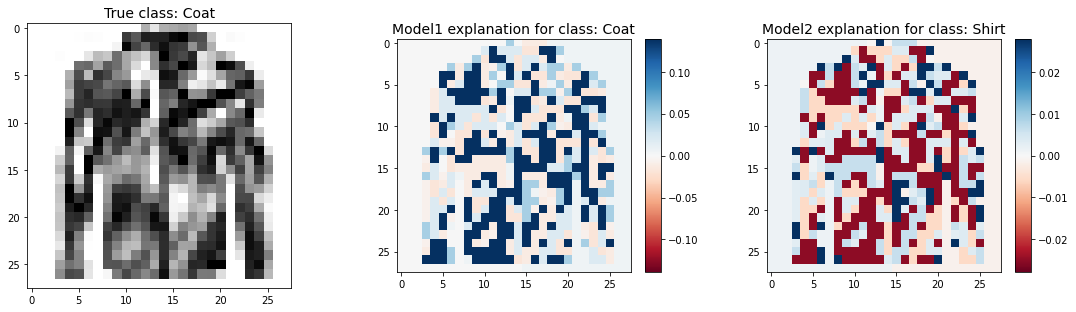

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4)

ax1.imshow(X_test[obs_idx2], cmap='binary')
ax1.set_title(f'True class: {classes[np.where(y_test[obs_idx2] == 1)[0][0]]}', fontsize=14)

heatmap = prepare_heatmap(explanations2[0], 0)
p2 = ax2.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax2.set_title(f'Model1 explanation for class: {classes[explanations2[0].top_labels[0]]}', fontsize=14)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p2, cax=cax)

heatmap = prepare_heatmap(explanations2[1], 0)
p3 = ax3.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
ax3.set_title(f'Model2 explanation for class: {classes[explanations2[1].top_labels[0]]}', fontsize=14)
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size="7%", pad=0.2)
plt.colorbar(p3, cax=cax)

plt.show()

**First of all, it's a hard item to classify - it could be a pullover, a shirt or finally a coat. Second of all, these explanations are somehow consistent. Despite the fact that top labels were different for this explanations, they are not entirely mutually exclusive; pixels increasing coat classification for model1 are decreasing shirt classification for model2 (however, to a much lesser extent).**